In [1]:
import glob
import os
import time
from scipy.io import loadmat
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Gene Files Paths:
IGT_path = 'C:/Users/NOE/Desktop/TFG-Example/Islet data/Mostres/Archivos con symbol/IGT'
ND_path = 'C:/Users/NOE/Desktop/TFG-Example/Islet data/Mostres/Archivos con symbol/ND'
T2D_path = 'C:/Users/NOE/Desktop/TFG-Example/Islet data/Mostres/Archivos con symbol/T2D'
T3cD_path = 'C:/Users/NOE/Desktop/TFG-Example/Islet data/Mostres/Archivos con symbol/T3cD'

# Diccionary to add the Files as DataFrames:
samples = {}

# Function to load the files, create DataFrames and modify the files names:
def load_and_modify_dataframes(path, prefijo):
    for archivo in os.listdir(path):
        if archivo.endswith('.txt'):
            ruta_archivo = os.path.join(path, archivo)
            # Load the file as DataFrame
            df = pd.read_csv(ruta_archivo, sep='\t',index_col=0)
            # Modify the DataFrame name:
            nombre_df = f'{prefijo}_{archivo}'
            # Store the DataFrame in the dictionary using the file name as the key:
            samples[nombre_df] = df

# Load the DataFrames and add them to the samples dictionary
load_and_modify_dataframes(IGT_path, 'IGT')
load_and_modify_dataframes(ND_path, 'ND')
load_and_modify_dataframes(T2D_path, 'T2D')
load_and_modify_dataframes(T3cD_path, 'T3cD')

# Print dictionary length
print(f"Longitud de samples: {len(samples)}")

# Print the names of all files in the samples dictionary
print("Nombres de archivos en el diccionario samples:")
for nombre_archivo in samples.keys():
    print(nombre_archivo)


Longitud de samples: 133
Nombres de archivos en el diccionario samples:
IGT_GSM5009231_DP005_s.txt
IGT_GSM5009232_DP007_s.txt
IGT_GSM5009233_DP008_s.txt
IGT_GSM5009237_DP013_s.txt
IGT_GSM5009241_DP025_s.txt
IGT_GSM5009249_DP048_s.txt
IGT_GSM5009251_DP051_s.txt
IGT_GSM5009258_DP059_s.txt
IGT_GSM5009260_DP063_s.txt
IGT_GSM5009264_DP067_s.txt
IGT_GSM5009265_DP068_s.txt
IGT_GSM5009268_DP071_s.txt
IGT_GSM5009273_DP076_s.txt
IGT_GSM5009277_DP081_s.txt
IGT_GSM5009278_DP082_s.txt
IGT_GSM5009282_DP088_s.txt
IGT_GSM5009285_DP093_s.txt
IGT_GSM5009296_DP108_s.txt
IGT_GSM5009298_DP110_s.txt
IGT_GSM5009302_DP116_s.txt
IGT_GSM5009307_DP123_s.txt
IGT_GSM5009313_DP137_s.txt
IGT_GSM5009314_DP138_s.txt
IGT_GSM5009316_DP140_s.txt
IGT_GSM5009318_DP144_s.txt
IGT_GSM5009319_DP145_s.txt
IGT_GSM5009323_DP151_s.txt
IGT_GSM5009341_DP184_s.txt
IGT_GSM5009343_DP186_s.txt
IGT_GSM5009345_DP190_s.txt
IGT_GSM5009349_DP195_s.txt
IGT_GSM5009351_DP204_s.txt
IGT_GSM5009352_DP206_s.txt
IGT_GSM5009353_DP207_s.txt
IGT_GSM500

In [26]:
new_samples = {}

for file_name, df in samples.items():
    # Obtener el prefijo del nombre del archivo
    if file_name.startswith("IGT"):
        prefijo = 'IGT'
    elif file_name.startswith("ND"):
        prefijo = 'ND'
    elif file_name.startswith("T2D"):
        prefijo = 'T2D'
    elif file_name.startswith("T3cD"):
        prefijo = 'T3cD'
    else:
        prefijo = 'Unknown'

    # Modificar el nombre de la columna
    column_name = df.columns[0]  # Obtener el nombre de la primera columna
    
    # Verificar si la extensión ya ha sido agregada al nombre de la columna
    if not column_name.startswith(prefijo + "_"):
        new_column_name = f'{prefijo}_{column_name}'  # Construir el nuevo nombre de la columna
    else:
        new_column_name = column_name

    # Renombrar la primera columna del DataFrame
    new_samples[file_name] = df.rename(columns={column_name: new_column_name})

samples = new_samples





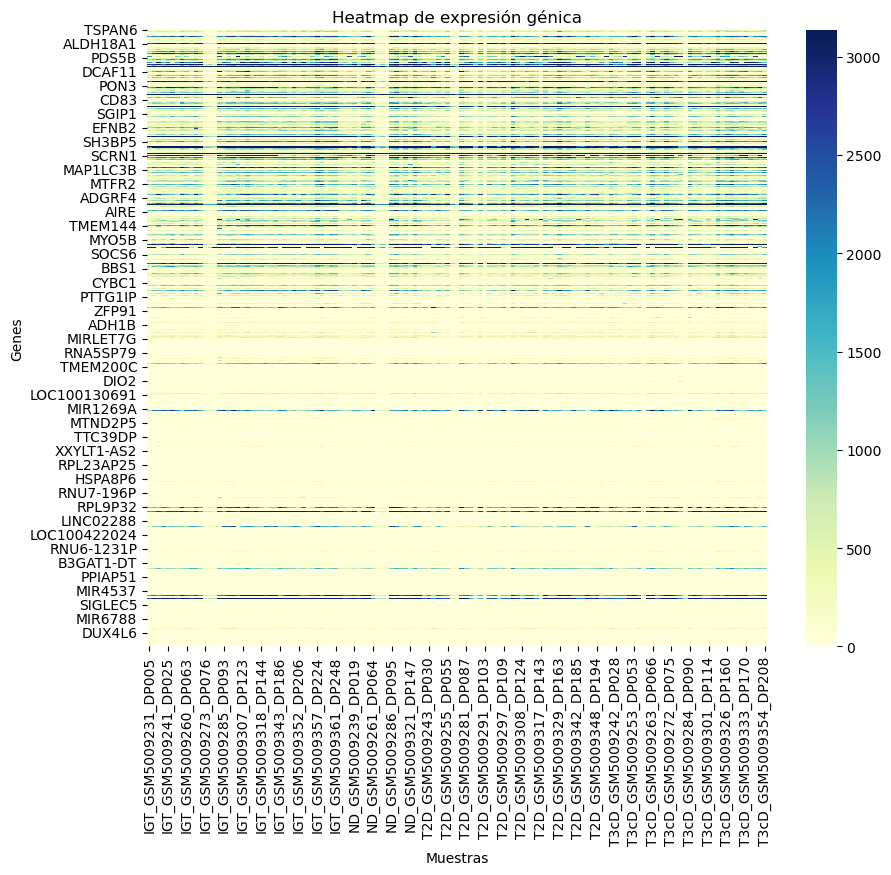

In [27]:
import seaborn as sns

data = pd.concat(samples.values(), axis=1)

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data, cmap="YlGnBu", robust=True)
plt.title("Heatmap de expresión génica")
plt.xlabel("Muestras")
plt.ylabel("Genes")
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(data, cmap="YlGnBu", annot=True, fmt=".1f", linewidth=.5)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.title("Heatmap de expresión génica")
plt.xlabel("Muestras")
plt.ylabel("Genes")
plt.show()

## ---------------------------------------------------------- 